# Exploring Correlation Methods

Today we are going to get some intuition on the interplay of accuracy and computational that is often an issue when dealing with computational problems.

We will be looking at some precomputed calculation that were made on a professional Quantum Chemistry software package (**Orca**).

We will focus our attention on methane:

![](files/methane.png)


First let's load some preliminaries
## <i class="fa fa-book"></i>  Preliminaries

In [1]:
# our bread and butter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# add all probables spots for the quantum world library
import sys
sys.path.append('../library')
sys.path.append('../../library')
sys.path.append('/home/student/chem160/library')
#This is how we'll import our own home-made modules
import quantumWorld as qworld
qworld.fancy_plotting()
# convenient units
hartree_to_kcal = 627.503

## Part 1: Loading the data

Our data is stored in python **pickle** format, let's load it:

In [2]:
import pickle
afile = open('files/data_methane.pckl')
data = pickle.load(afile )
afile.close()

Once we load it it will be a dictionary of dictionaries, exploring the following correlation methods:

* HF
* MP2
* QCISD
* CCSD
* CCSD(T)
* DLPNO-CCSD

Each method can be accesed via:

```python
data[method]
```
for example 'MP2' calculation data is:

```python
data['MP2']
```

### Try loading one type of method, what type of data is inside?

In [3]:
data['MP2']

{'Basis_set': ['6-31G', 'cc-pVDZ', 'cc-pVTZ', 'cc-pVQZ', 'cc-pV5Z'],
 'Ctime': [1.015, 1.541, 3.765, 45.369, 570.584],
 'E_corr': [0.098448266952004815,
  0.16044102962799656,
  0.19860555011000258,
  0.21050572041399818,
  0.21485041048799758],
 'E_corr_percent': [25.264166725662118,
  42.948607882426153,
  55.860940417304128,
  59.708858549515803,
  61.071912860610517],
 'Energy': [-40.223826769036,
  -40.301929881791,
  -40.358123911434,
  -40.37300613493,
  -40.378105356378],
 'Nbasis': [17, 34, 86, 175, 311]}

Each method has information on various aspects of the calculations:

* **Basis_set**, basis set  used.
* **Nbasis**, number of basis functions.
* **Energy**, final energy calculation.
* **Ctime**, computing time in seconds.
* **E_corr**, correlation energy recovered, remember $E_{corr} = E_{method}-E_{HF}$
* **E_corr_percent**, percent of correlation energy recovered, in this case, comparing with the exact energy. In formula this would be $ \frac{|E_{corr}|}{|E_{exact}-E_{HF}|} \times 100$

Each of these elements is an array, so for example if you wanted to access the Calculation times for MP2 methods, you would use:


```python
data['MP2']['Ctime']
```

# Try it out!

In [ ]:
data['MP2']['Ctime']

## Part 2 : Finding trends

We will do plotting and curve fitting to figure out the trends for multiple methods.

For this we have the utility function **qworld.polynomial_fit(x,y)** which recieves as input an array vector **x** and **y** of data and will return a array **x_fit, y_fit** and **label_fit** which represents the fitted polynomial.

### Fitting a trend example

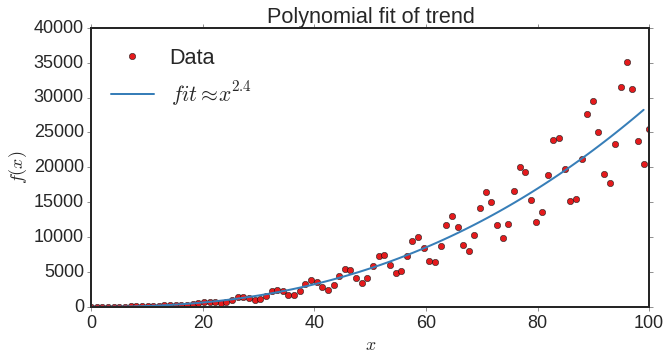

In [4]:
# set the data
x = np.linspace(0,100,100)
y = 0.3 * np.power(x,2.5)*(1+0.3*np.sin(x))
# get the fit
x_fit,y_fit,label_fit = qworld.polynomial_fit(x,y)
#plotting stuff
plt.plot(x,y,'o',label='Data')
plt.plot(x_fit,y_fit,label=label_fit)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Polynomial fit of trend')
plt.legend(loc='best')
plt.show()

## Your mission: <br> find out trends for multiple variables <i class="fa fa-line-chart"></i>
Mainly using x as a dimention for the number of basis sets, for multiple methods, investigate:

* Scaling factor for computing times
* Correlation energy retrieved.
* Percent of Correlation energy calculated.


### <i class="fa fa-line-chart"></i> Effect on computing time


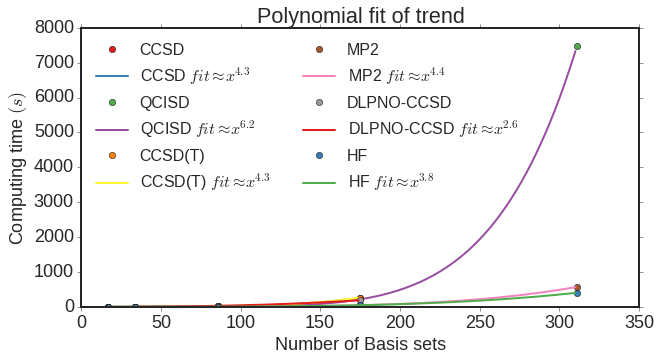

In [5]:
for method in data.keys():
    x = data[method]['Nbasis']
    y = data[method]['Ctime']
    x_fit,y_fit,label_fit = qworld.polynomial_fit(x,y)
    plt.plot(x,y,'o',label=method)
    plt.plot(x_fit,y_fit,label=method+" "+label_fit)
plt.xlabel('Number of Basis sets')
plt.ylabel('Computing time $(s)$')
plt.title('Polynomial fit of trend')
plt.legend(loc='best',ncol=2,prop={'size':16})
plt.show()

### <i class="fa fa-line-chart"></i> Effect on correlation energy


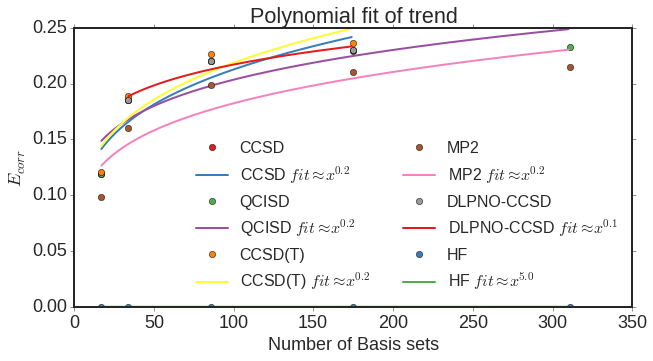

In [6]:
for method in data.keys():
    x = data[method]['Nbasis']
    y = data[method]['E_corr']
    x_fit,y_fit,label_fit = qworld.polynomial_fit(x,y)
    plt.plot(x,y,'o',label=method)
    plt.plot(x_fit,y_fit,label=method+" "+label_fit)
plt.xlabel('Number of Basis sets')
plt.ylabel('$E_{corr}$')
plt.title('Polynomial fit of trend')
plt.legend(loc='best',ncol=2,prop={'size':16})
plt.show()

### <i class="fa fa-line-chart"></i> Effect on percent of correlation energy

In [ ]:
for method in data.keys():
    x = data[method]['Nbasis']
    y = data[method]['E_corr_percent']
    x_fit,y_fit,label_fit = qworld.polynomial_fit(x,y)
    plt.plot(x,y,'o',label=method)
    plt.plot(x_fit,y_fit,label=method+" "+label_fit)
plt.xlabel('Number of Basis sets')
plt.ylabel('$E_{corr}$%')
plt.title('Polynomial fit of trend')
plt.legend(loc='best',ncol=2,prop={'size':16})
plt.show()

### <i class="fa fa-question-circle"></i> Questions

* Any other ideas on possible interesting trends to look at?
* What would be the sweet spot between accurate and still not to expensive?